In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/ВКР')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Анализ полученных данных

In [ ]:
df = pd.read_csv('data.csv')

<ipython-input-4-6456521db808>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv')


In [ ]:
df.shape

(12308138, 9)

In [ ]:
def plots(df, name_col, start_n, end_n):
  rr = []
  for i in range (start_n, end_n+1):
    dff = df.loc[df['Натуральное число n'] == i]
    r = dff[name_col].tolist ()
    rr.append(r)
  y = []
  x = []
  for i in rr:
    yy = list(set(i))
    num_unique_values = len(yy)
    xx = [i.count(val) for val in yy]
    y.append(yy)
    x.append(xx)
  return x, y

 ## Анализ рангов разбиения

In [ ]:
X, Y = plots(df, 'Ранг', 1, 64)

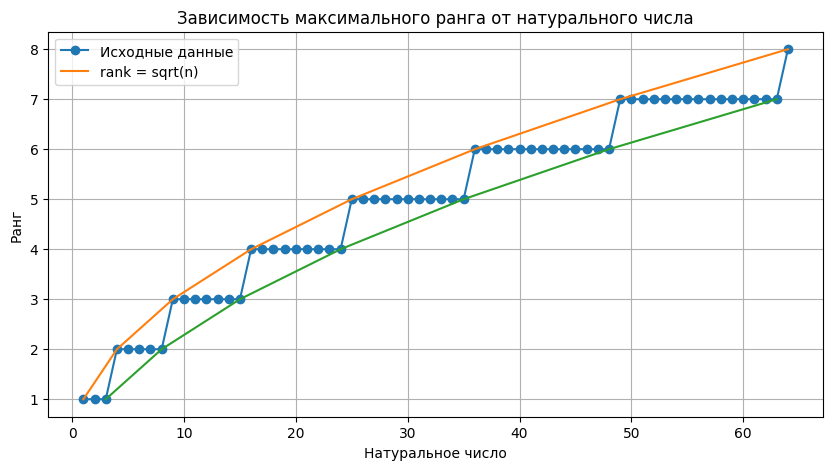

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(Y) + 1), [len(i) for i in Y], label='Исходные данные', marker = 'o')
plt.xlabel('Натуральное число')
plt.ylabel('Ранг')
plt.title('Зависимость максимального ранга от натурального числа')

y_ = [i for i in range(1, 9)]
x_min = [i**2 for i in y_]

plt.plot(x_min, y_, label='rank = sqrt(n)')

x_max = [i-1 for i in x_min]
x_max.pop(0)
y_min = [i for i in range(1, 8)]
plt.plot(x_max, y_min)

plt.legend()
plt.grid()
plt.show()

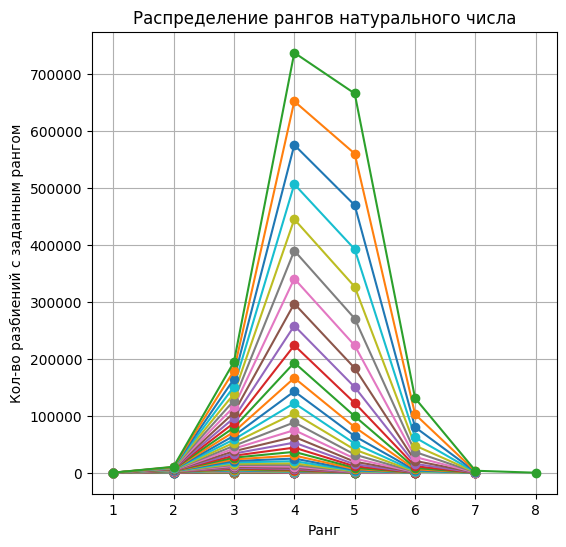

In [ ]:

plt.figure(figsize=(6, 6))
for i in range(1,64):
  plt.plot(Y[i], X[i], marker='o')
  plt.title('Распределение рангов натурального числа')
  #plt.gca().legend()
  plt.gca().grid(True)
  plt.gca().format_coord = lambda x, y: f'x={X:.2f}, y={Y:.2f}'
  plt.xlabel('Ранг')
  plt.ylabel('Кол-во разбиений с заданным рангом')


In [ ]:
import numpy as np

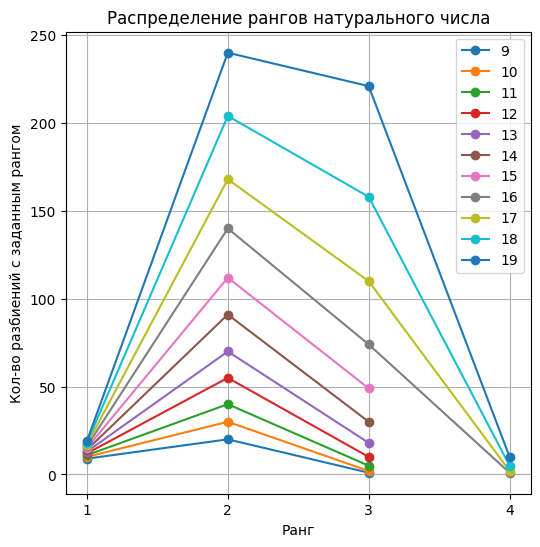

In [ ]:
plt.figure(figsize=(6, 6))
for i in range(8,19):
  n=i+1
  plt.plot(Y[i], X[i], marker='o', label=str(n))
  plt.title('Распределение рангов натурального числа')
  #plt.gca().legend()
  plt.gca().grid(True)
  plt.gca().format_coord = lambda x, y: f'x={X:.2f}, y={Y:.2f}'
  plt.xlabel('Ранг')
  plt.ylabel('Кол-во разбиений c заданным рангом')
  plt.xticks(np.arange(min(Y[i]), max(Y[i])+1, 1.0))
  plt.legend()


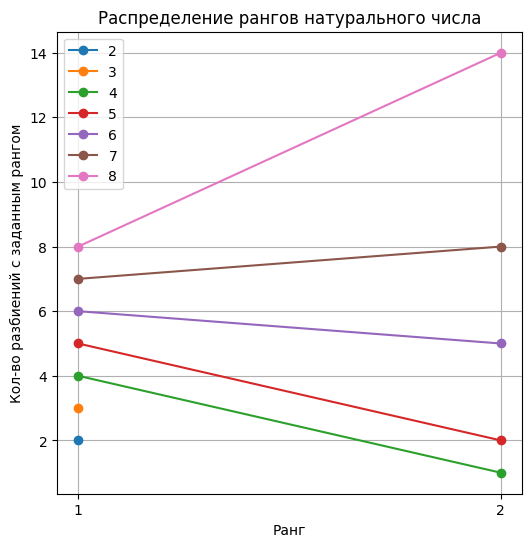

In [ ]:
plt.figure(figsize=(6, 6))
for i in range(1,8):
  n=i+1
  plt.plot(Y[i], X[i], marker='o', label=str(n))
  plt.title('Распределение рангов натурального числа')
  #plt.gca().legend()
  plt.gca().grid(True)
  plt.gca().format_coord = lambda x, y: f'x={X:.2f}, y={Y:.2f}'
  plt.xlabel('Ранг')
  plt.ylabel('Кол-во разбиений c заданным рангом')
  plt.xticks(np.arange(min(Y[i]), max(Y[i])+1, 1.0))
  plt.legend()

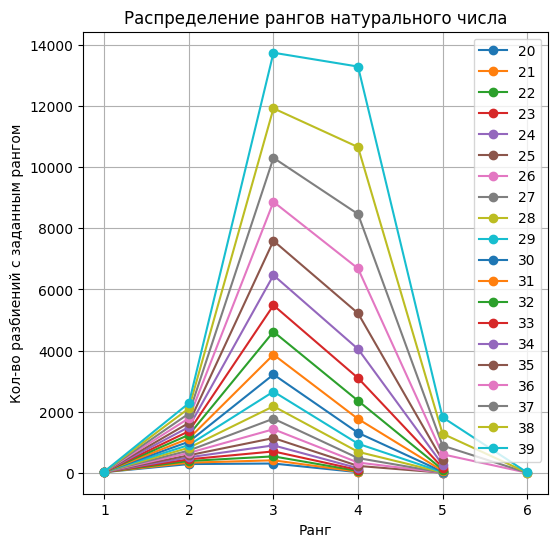

In [ ]:
plt.figure(figsize=(6, 6))
for i in range(19,39):
  n=i+1
  plt.plot(Y[i], X[i], marker='o', label=str(n))
  plt.title('Распределение рангов натурального числа')
  #plt.gca().legend()
  plt.gca().grid(True)
  plt.gca().format_coord = lambda x, y: f'x={X:.2f}, y={Y:.2f}'
  plt.xlabel('Ранг')
  plt.ylabel('Кол-во разбиений с заданным рангом')
  plt.xticks(np.arange(min(Y[i]), max(Y[i])+1, 1.0))
  plt.legend()

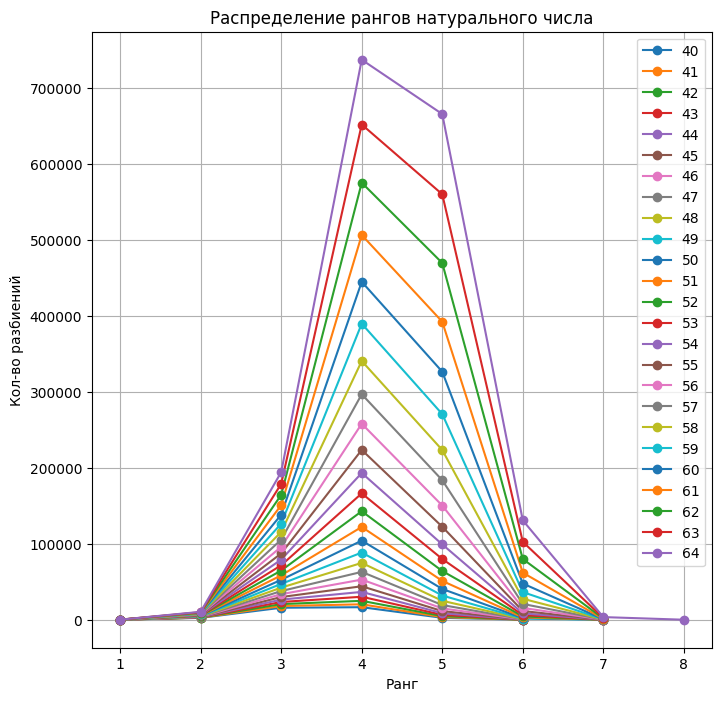

In [ ]:
plt.figure(figsize=(8, 8))
for i in range(39,64):
  n=i+1
  plt.plot(Y[i], X[i], marker='o', label=str(n))
  plt.title('Распределение рангов натурального числа')
  #plt.gca().legend()
  plt.gca().grid(True)
  plt.gca().format_coord = lambda x, y: f'x={X:.2f}, y={Y:.2f}'
  plt.xlabel('Ранг')
  plt.ylabel('Кол-во разбиений')
  plt.legend()

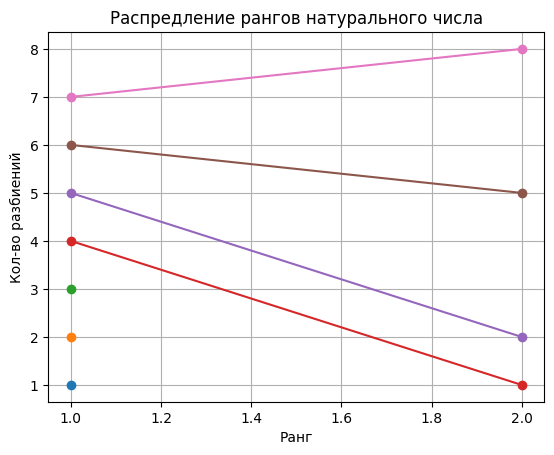

In [ ]:
for i in range(len(X[3:10])):
  plt.plot(Y[i], X[i], marker='o')
  plt.title('Распредление рангов натурального числа')
  #plt.gca().legend()
  plt.gca().grid(True)
  plt.gca().format_coord = lambda x, y: f'x={X:.2f}, y={Y:.2f}'
  plt.xlabel('Ранг')
  plt.ylabel('Кол-во разбиений')

## Анализ самоассоциированных разбиений

In [ ]:
x_a = [] #список натуральных чисел от 1 до 64
y_a = [] #кол-во самоассоциированных разбиений
for i in range(1, 64):
  x_a.append(i)
  y_a.append(len(df[(df['Натуральное число n'] == i) &  (df['Самоассоциированные разбиения'] == 1)]))

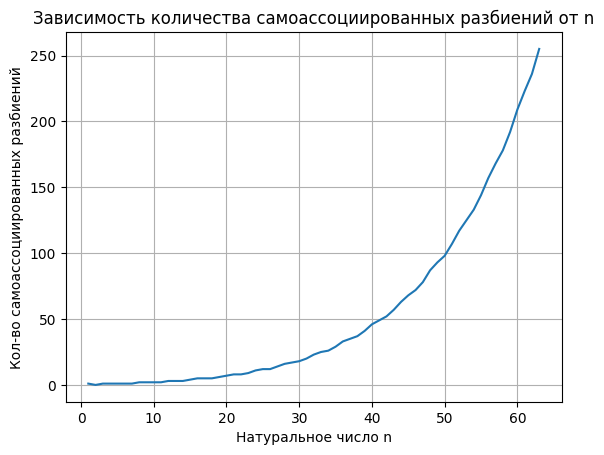

In [ ]:
plt.xlabel('Натуральное число n')
plt.ylabel('Кол-во самоассоциированных разбиений')
plt.title('Зависимость количества самоассоциированных разбиений от n')
plt.plot(x_a, y_a)
plt.grid()

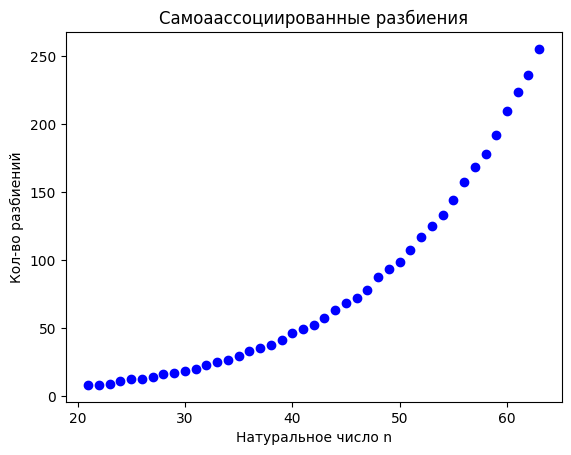

Mean Squared Error: 1.3744633720270356
R^2 Score: 0.9997212378842983


Text(0.5, 1.0, 'Аппроксимация данных')

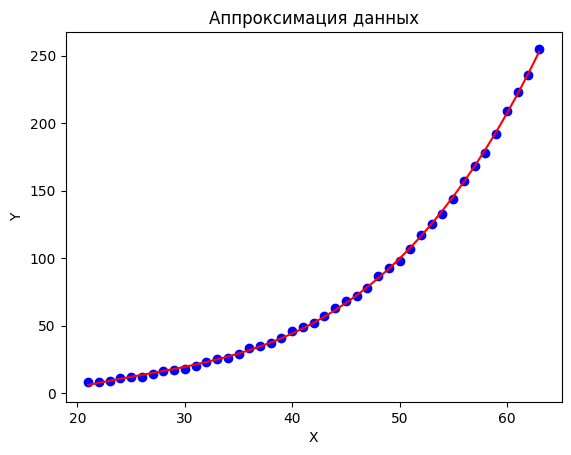

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Исходные данные
X = x_a[20:]
Y = y_a[20:]

# Визуализация исходных данных
plt.scatter(X, Y, color='blue')
plt.xlabel('Натуральное число n')
plt.ylabel('Кол-во разбиений')
plt.title('Самоаассоциированные разбиения')
plt.show()

# Преобразование данных для полиномиальной регрессии
X_poly = np.array(X).reshape(-1, 1)
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X_poly)

# Обучение модели полиномиальной регрессии
poly_reg = LinearRegression()
poly_reg.fit(X_poly, Y)

# Предсказание значений с помощью модели
Y_pred = poly_reg.predict(X_poly)

# Вычисление MSE
mse = mean_squared_error(Y, Y_pred)
print(f"Mean Squared Error: {mse}")

# Вычисление R^2 Score
r2 = r2_score(Y, Y_pred)
print(f"R^2 Score: {r2}")

# Построение графика с аппроксимацией
plt.scatter(X, Y, color='blue')
plt.plot(X, Y_pred, color='red', linestyle='-')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Аппроксимация данных')

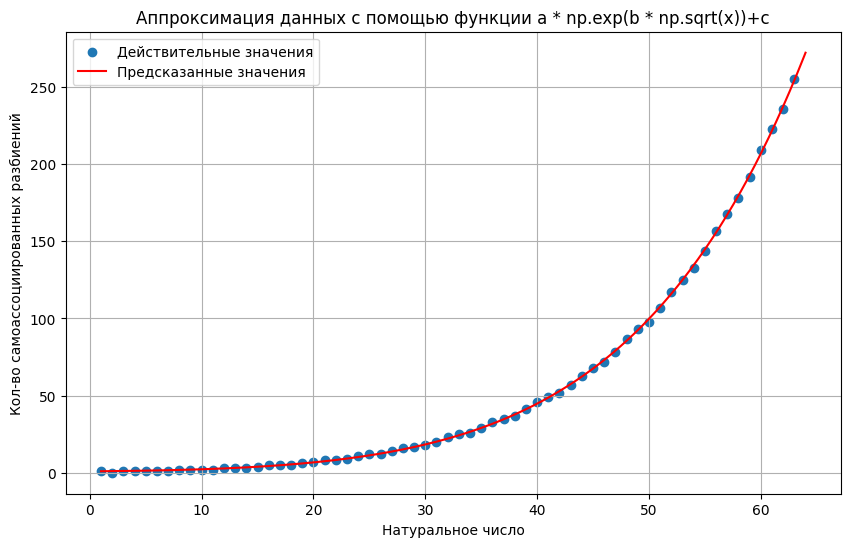

Коэффициент a: 0.046
Коэффициент b: 1.086
Коэффициент c: 0.338
Mean Absolute Error: 0.638
Mean Squared Error: 0.649
R^2 Score: 0.99986


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# Определение функции для аппроксимации
def mapping(x, a, b,c):
    return a * np.exp(b * np.sqrt(x))+c

args, covar = curve_fit(mapping, x_a, y_a)

x_fit = np.linspace(1, 64, 500)
y_fit = mapping(x_fit, *args)

# Построение графиков
plt.figure(figsize=(10, 6))
plt.scatter(x_a, y_a, label='Действительные значения')
plt.plot(x_fit, y_fit, 'r', label='Предсказанные значения')
plt.xlabel('Натуральное число')
plt.ylabel('Кол-во самоассоциированных разбиений')
plt.title('Аппроксимация данных с помощью функции a * np.exp(b * np.sqrt(x))+c')
plt.legend()
plt.grid(True)
plt.show()
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = mapping(x_a, *args)

# Вычисление метрик
mae = mean_absolute_error(y_a, y_pred)
mse = mean_squared_error(y_a, y_pred)
r2 = r2_score(y_a, y_pred)

a = args[0]
b = args[1]

print("Коэффициент a:", round(a,3))
print("Коэффициент b:", round(b,3))
print("Коэффициент c:", round(c,3))
print("Mean Absolute Error:", round(mae, 3))
print("Mean Squared Error:", round(mse, 3))
print("R^2 Score:", round(r2,6))

In [ ]:
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

if mae < 0.5 and mse < 1.0:
    print("Полученные метрики указывают на хорошее качество аппроксимации данных.")
else:
    print("Метрики указывают на некоторое отклонение модели от реальных данных.")

Mean Absolute Error: 5.0619421640689675
Mean Squared Error: 96.90478570472436
R^2 Score: 0.9790673496308765
Метрики указывают на некоторое отклонение модели от реальных данных.


## Анализ частного степени разбиения

In [ ]:
v = df[(df['Натуральное число n'] == 30)]
y = v['Частное степени разбиения'].to_list()
mid = len(y)//2
x = [i for i in range(len(y))]
y = sorted(y[:mid]) + sorted(y[mid:], reverse=True)

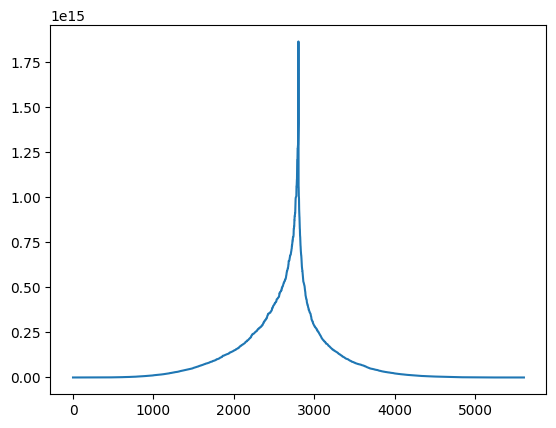

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x,y)